**Crop Recommendation**

**Load the required modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Load the required dataset**

In [2]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Data Science/Datasets/Crop_recommendation.csv")

**View the dataset**

In [3]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


**Structure of the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Check for missing values**

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Check for duplicates**

In [6]:
df.duplicated().sum()

0

**Checking for Outliers**

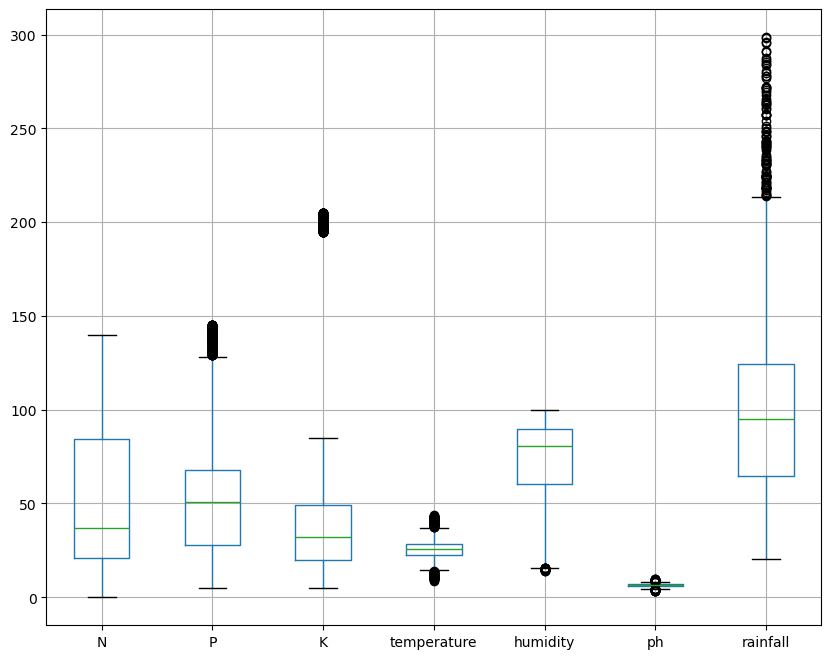

In [7]:
numeric_cols = df.select_dtypes(include = ["float64", "int64"])
numeric_cols.boxplot(figsize = (10, 8))
plt.show()

**Data Preprocessing**

**Renaming Variables**

In [8]:
df.rename(columns = {
    'N' : 'Nitrogen',
    'P' : 'Phosphorus',
    'K' : 'Potassium',
    'label' : 'Crop'}, inplace = True)

**Handling Outliers**

In [14]:
## Phosphorus
Q1 =df['Phosphorus'].quantile(0.25)
Q3 = df['Phosphorus'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['Phosphorus'] >= lower_bound) & (df['Phosphorus'] <= upper_bound)]

## Rainfall
Q1 =df['rainfall'].quantile(0.25)
Q3 = df['rainfall'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['rainfall'] >= lower_bound) & (df['rainfall'] <= upper_bound)]

## Temperature
Q1 =df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['temperature'] >= lower_bound) & (df['temperature'] <= upper_bound)]

## Potassium
Q1 =df['Potassium'].quantile(0.25)
Q3 = df['Potassium'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['Potassium'] >= lower_bound) & (df['Potassium'] <= upper_bound)]

## pH
Q1 =df['ph'].quantile(0.25)
Q3 = df['ph'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['ph'] >= lower_bound) & (df['ph'] <= upper_bound)]


**Exploratory Data Analysis**

**Plotting Histograms and density plots for continous variables**

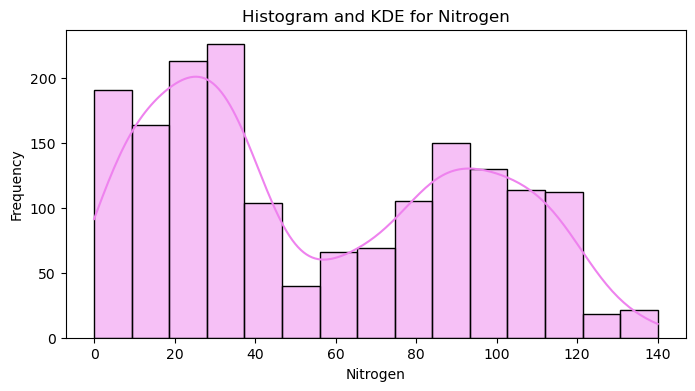

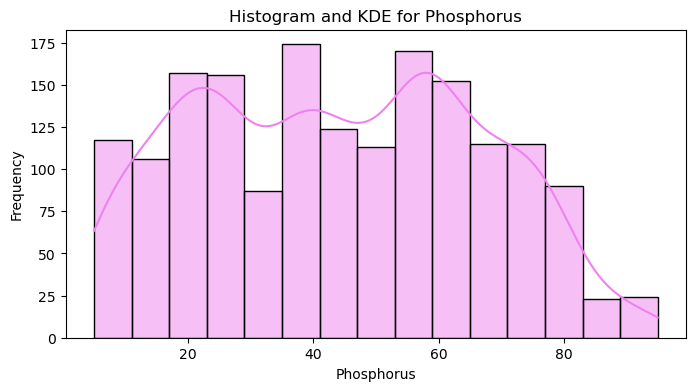

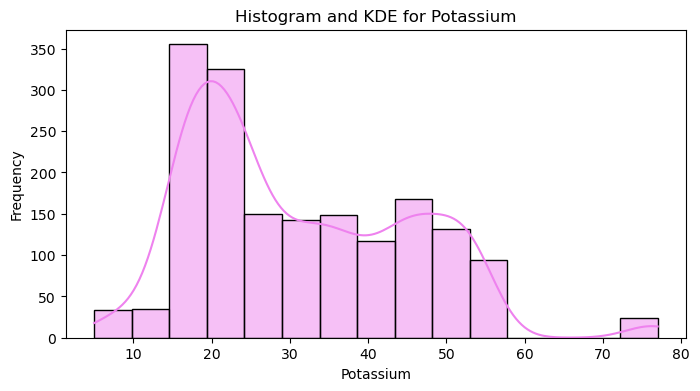

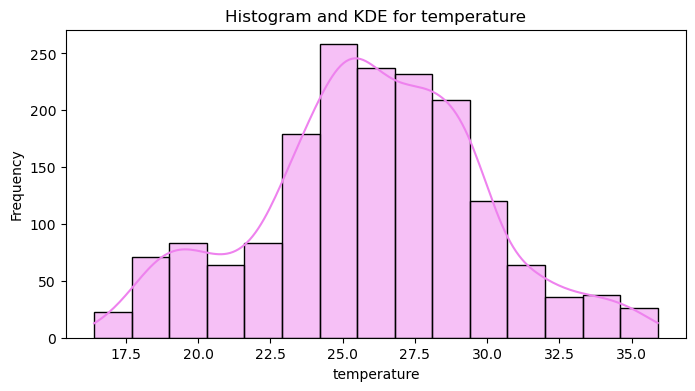

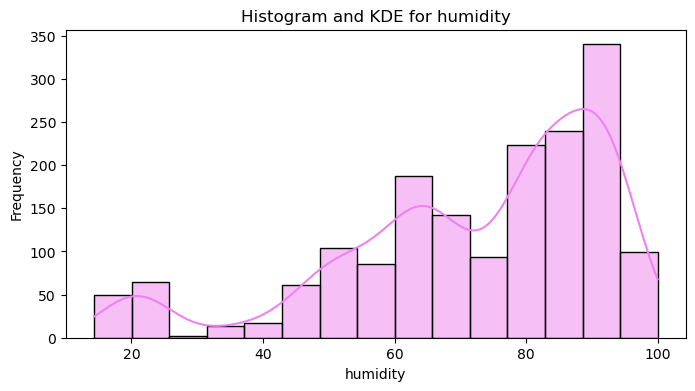

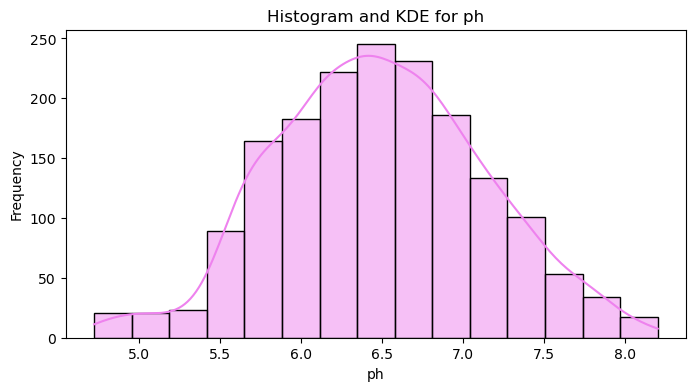

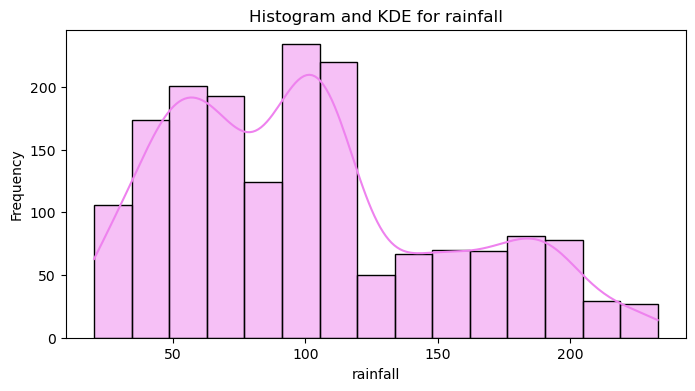

In [15]:
numeric_col = df.select_dtypes(include = ["float64", "int64"])
for col in numeric_col:
    plt.figure(figsize = (8, 4))
    sns.histplot(df[col], kde = True, bins = 15, color = "violet")
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Summary Statistics**

In [16]:
df.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,55.332559,43.940801,31.066744,25.949717,72.010973,6.484273,100.579382
std,38.658834,22.513797,14.047442,3.847406,20.374253,0.644455,51.652117
min,0.000000,5.000000,5.000000,16.396243,14.323138,4.722222,20.211267
25%,22.000000,24.000000,20.000000,23.634643,61.064035,6.035346,58.673829
50%,40.000000,44.000000,27.000000,26.001751,78.626977,6.461226,95.019132
75%,91.000000,61.000000,43.000000,28.552969,88.820796,6.923776,130.508713
max,140.000000,95.000000,77.000000,35.898556,99.981876,8.204862,233.132137


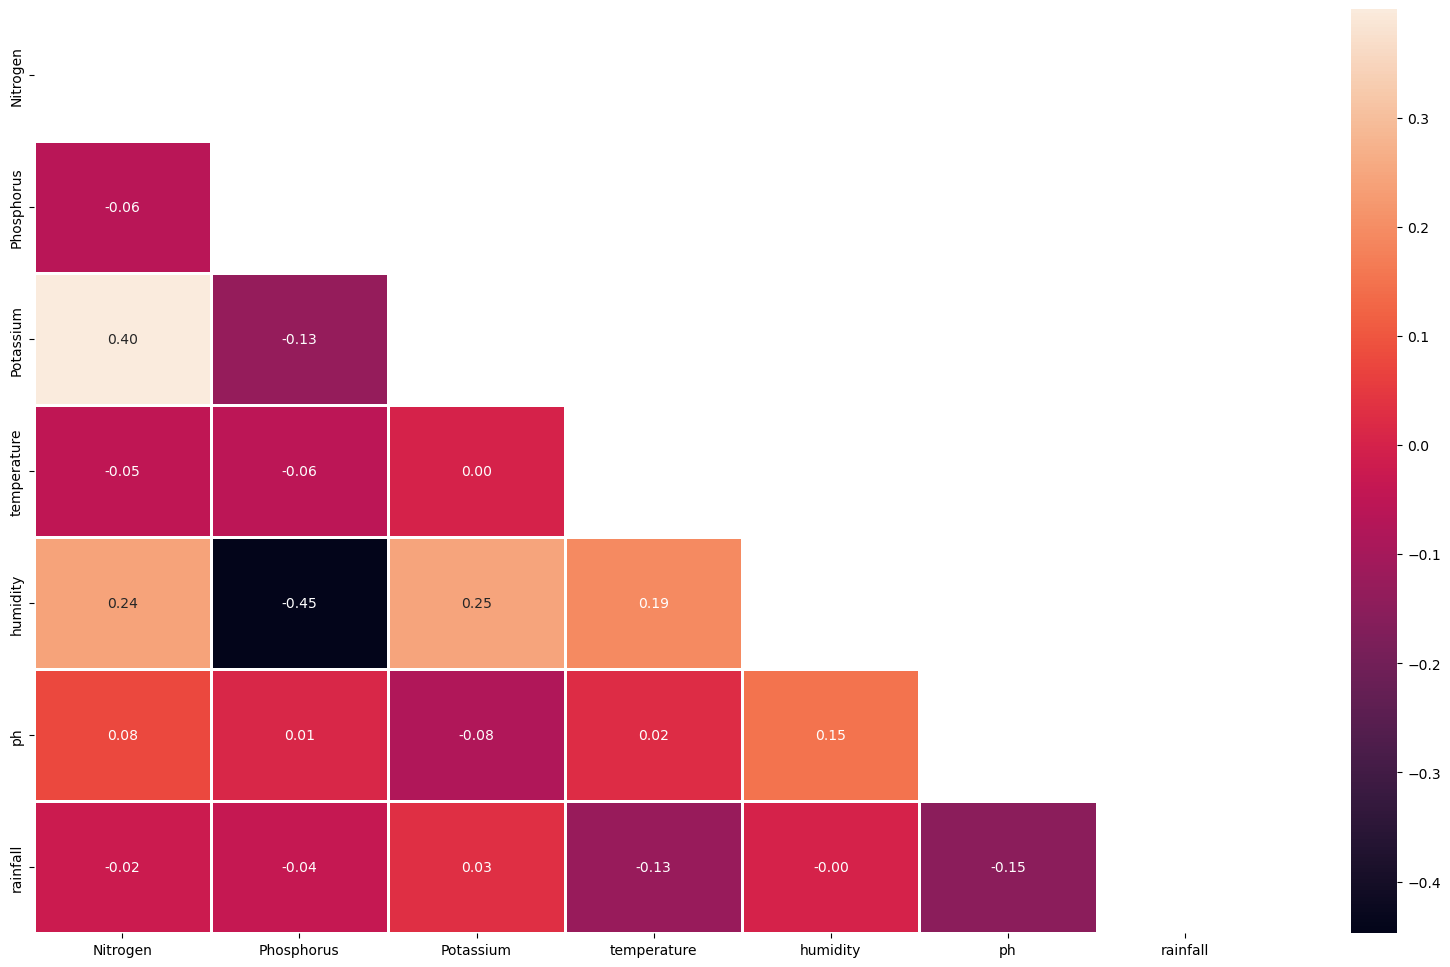

In [17]:
# heatmap

plt.figure(figsize = (20, 12))

corr = numeric_col.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

**Distribution of the Study Variable**

In [20]:
freq_table = df['Crop'].value_counts()
percent_table = df['Crop'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Frequency': freq_table, 'Percentage': percent_table.round(2)})
print(result)

      Frequency  Percentage
Crop                       
0           100        5.80
17          100        5.80
6           100        5.80
5           100        5.80
3           100        5.80
13          100        5.80
19          100        5.80
9           100        5.80
4           100        5.80
8           100        5.80
1           100        5.80
12          100        5.80
10           92        5.34
7            91        5.28
16           82        4.76
14           77        4.47
11           53        3.08
15           53        3.08
18           51        2.96
2            24        1.39


**Label Encode the study outcome**

In [19]:
## Load the required module
from sklearn.preprocessing import LabelEncoder

## Select the study outcome
categorical_cols = df.select_dtypes(include = ["object"]).columns

## Initialize the label encoder
label_encoder = LabelEncoder()
 
## Apply label encooding to selected columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

**Define the X and y Features**

In [21]:
X = df.drop(columns = ["Crop"])
y = df["Crop"]

**Splitting the data into training and testing sets**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Feature Scaling**

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**1. Logistic Regression**

In [24]:
## Load the required modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

## Initialize the model
reg = LogisticRegression()

## Fit the model
reg.fit(X_train, y_train)

## Make predictions
lr_pred = reg.predict(X_test)

## Print the evaluation metrics
print("Classification Report is:\n",classification_report(y_test,lr_pred))

## Print the accuracy score
reg_score = accuracy_score(y_test, lr_pred)


Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.86      1.00      0.93        25
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        16
           6       0.67      1.00      0.80        14
           7       0.95      0.95      0.95        21
           8       0.88      0.94      0.91        16
           9       0.95      1.00      0.98        20
          10       0.86      1.00      0.93        19
          11       1.00      0.15      0.27        13
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15
          15       1.00      0.86      0.92         7
          16       0.89      1.00      0.94        17


**2. Random Forest**

In [25]:
## Load the required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Initialize the model
RF = RandomForestClassifier()

## Define the hyperparameters
n_estimators = [1800]
max_features = ['sqrt', 'log2']

## Define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

## Fit the model using grid search
best_model = grid_search.fit(X_train, y_train)

## Make predictions
rf_pred = best_model.predict(X_test)

## Print the accuracy score
RF_score= accuracy_score(y_test, rf_pred)

## Print the evaluation matrix
print("Classification Report is:\n",classification_report(y_test, rf_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        16
           6       0.88      1.00      0.93        14
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00        17


**3. Support Vector Machines**

In [26]:
## Load the required modules
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Define model and parameter grid
svm = SVC()
kernel = ['poly', 'rbf']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel, C=C, gamma=gamma)

## Setup cross-validation and GridSearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)

## Fit the model
grid_result = grid_search.fit(X_train, y_train)

## Predict class labels on test data
svm_pred = grid_result.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, svm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      0.97      0.98        30
           5       1.00      0.94      0.97        16
           6       0.80      0.86      0.83        14
           7       1.00      1.00      1.00        21
           8       0.94      1.00      0.97        16
           9       0.95      1.00      0.98        20
          10       1.00      1.00      1.00        19
          11       1.00      0.85      0.92        13
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00        17
   

**4. XG Boost**

In [27]:
## Load the required module
from xgboost import XGBClassifier

## Intialize the model
xgb = XGBClassifier()

## Fit the model
xgb.fit(X_train, y_train)

## Make predictions
xgb_pred = xgb.predict(X_test)

## Print the accuracy score
xgb_score  = xgb.score(X_test, y_test)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.93      1.00      0.96        25
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      0.97      0.98        30
           5       1.00      1.00      1.00        16
           6       0.88      1.00      0.93        14
           7       0.95      1.00      0.98        21
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        19
          11       1.00      0.85      0.92        13
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00         7
          16       1.00      0.94      0.97        17
   

**5. K Nearest Neighbors**

In [28]:
## Load the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

## List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors =range(15,25)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

## convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

## Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

best_model = grid_search.fit(X_train, y_train)

## Making Predictions
knn_pred = best_model.predict(X_test)

## Print the evaluation metrics
Knn_score = accuracy_score(y_test, knn_pred)
print("Classification Report is:\n",classification_report(y_test,knn_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.89      1.00      0.94        25
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      0.97      0.98        30
           5       1.00      1.00      1.00        16
           6       0.74      1.00      0.85        14
           7       0.95      1.00      0.98        21
           8       0.83      0.94      0.88        16
           9       1.00      1.00      1.00        20
          10       0.95      1.00      0.97        19
          11       1.00      0.62      0.76        13
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00         7
          16       1.00      0.88      0.94        17


**6. Gradient Boosting Machines**

In [29]:
## Load the required modules
from sklearn.ensemble import GradientBoostingClassifier

## Initialize the softwares
gbc = GradientBoostingClassifier()

## Define the hyperparameters
parameters = {
    'loss': ['deviance', 'log_loss'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

## Fit the model with the best hyperparameters
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

## Make predictions
gbc_pred = grid_search_gbc.predict(X_test)

## Evaluate performance
gbc_score = accuracy_score(y_test, gbc_pred)
print("Classification Report:\n", classification_report(y_test, gbc_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      0.93      0.97        30
           5       1.00      1.00      1.00        16
           6       0.78      1.00      0.88        14
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        19
          11       1.00      0.92      0.96        13
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00      

**7. Voting Classifier**

In [ ]:
## Load the required module
from sklearn.ensemble import VotingClassifier

## Define the base classifiers
classifiers = [('Logistic Regression', reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svm)]

## Initialize the model
vc = VotingClassifier(estimators = classifiers)

## Fit the model
vc.fit(X_train, y_train)

## Make predictions
vc_pred = vc.predict(X_test)

## Evaluate performance
vc_score = accuracy_score(y_test, vc_pred)
print("Classification Report:\n", classification_report(y_test, vc_pred))

**Model comparison**

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest Classifier', 'Voting Classifier',
             'Gradient Boosting Classifier', 'xgboost'],
    'Score': [reg_score, Knn_score, svm_score, RF_score, vc_score, gbc_score, xgb_score]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
## Lets save our model using pickle
import pickle as pkl
pkl.dump(xgb, open("obesity.sav","wb"))